In [ ]:
%matplotlib inline

In [ ]:
from scipy.io import wavfile
from scipy.fft import fft, fftfreq
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Non-stationary signal

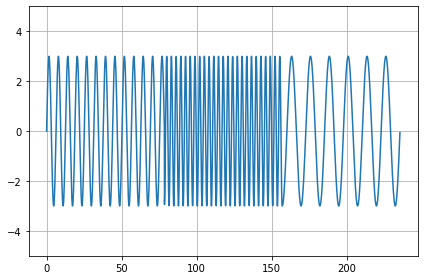

In [ ]:
x = np.arange(0,75*np.pi,0.1)
x1 = np.arange(0,25*np.pi,0.1)
x2 = np.arange(25*np.pi+0.1, 50*np.pi, 0.1)
x3 = np.arange(50*np.pi, 75*np.pi, 0.1)
y = np.concatenate((np.concatenate((3 * np.sin(x1), 3 * np.sin(2 * x2 - np.pi/2))), 3 * np.sin(0.5 * x3 + np.pi/2)))

fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_ylim(-5, 5)

ax.grid()

plt.tight_layout()
plt.show()

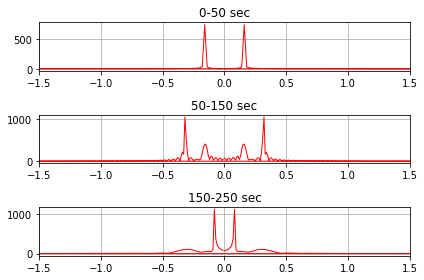

In [ ]:
from scipy.fft import fft, fftfreq
import numpy as np

yf1 = fft(y[x<50])
xf1 = fftfreq(len(x[x<50]), 0.1)

yf2 = fft(y[(x<150) & (x > 50)])
xf2 = fftfreq(len(x[(x<150) & (x > 50)]), 0.1)

yf3 = fft(y[(x<250) & (x > 150)])
xf3 = fftfreq(len(x[(x<250) & (x > 150)]), 0.1)

fig, ax = plt.subplots(3, 1)
ax[0].plot(xf1, np.abs(yf1), color="red", marker="", linestyle="-", linewidth="1")
ax[1].plot(xf2, np.abs(yf2), color="red", marker="", linestyle="-", linewidth="1")
ax[2].plot(xf3, np.abs(yf3), color="red", marker="", linestyle="-", linewidth="1")

ax[0].set_xlim(-1.5, 1.5)
ax[1].set_xlim(-1.5, 1.5)
ax[2].set_xlim(-1.5, 1.5)

ax[0].grid()
ax[1].grid()
ax[2].grid()

ax[0].set_title("0-50 sec")
ax[1].set_title("50-150 sec")
ax[2].set_title("150-250 sec")
plt.tight_layout()
plt.show()

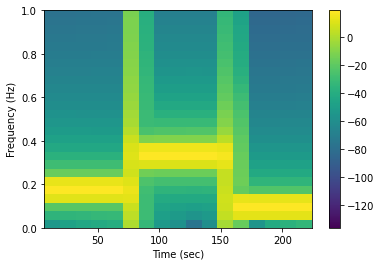

In [ ]:
plt.specgram(y, Fs=10)
plt.ylim(0, 1)
plt.xlabel("Time (sec)")
plt.ylabel("Frequency (Hz)")
plt.colorbar()

# Audio example

In [ ]:
# Loading data from a .mat file
audio_file = wavfile.read('/content/drive/MyDrive/Sensor Analytics Data/nsa_st.wav')
audio = np.array(audio_file[1],dtype=float)
step = 23/len(audio) # 5 second long audio clip

In [ ]:
from IPython.display import Audio
Audio(audio_file[1], rate=audio_file[0])

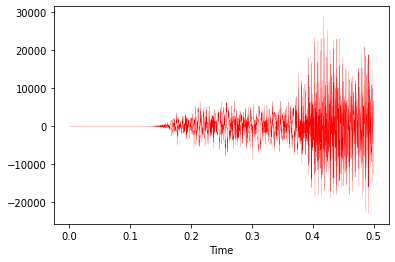

In [ ]:
time = np.arange(0, 23, step)

fig, ax = plt.subplots(1, 1)
ax.plot(time[time<0.5], audio[time<0.5], color="red", marker="", linestyle="-", linewidth="0.2")
ax.set_xlabel("Time")
plt.show()

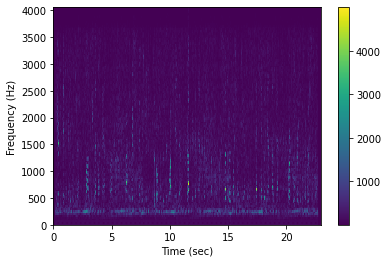

In [ ]:
import scipy.signal as signal

f, t, Zxx = signal.stft(audio, fs=1/step)
plt.pcolormesh(t, f, np.abs(Zxx))
plt.xlabel("Time (sec)")
plt.ylabel("Frequency (Hz)")
plt.colorbar()

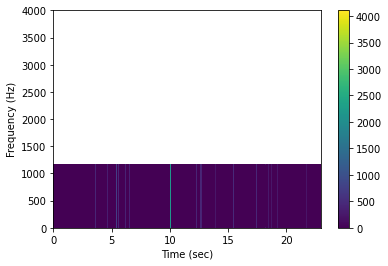

In [ ]:
f[f < 400] = 0
Zxx[f < 400] = 0

f[f > 1200] = 0
Zxx[f > 1200] = 0

Zxx[Zxx < 200] = 0

plt.pcolormesh(t, f, np.abs(Zxx))
plt.xlabel("Time (sec)")
plt.ylabel("Frequency (Hz)")
plt.ylim(0, 4000)
plt.colorbar()

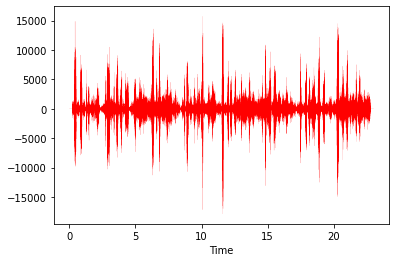

In [ ]:
time, audio_filtered = signal.istft(Zxx,fs=1/step)

fig, ax = plt.subplots(1, 1)
ax.plot(time, audio_filtered, color="red", marker="", linestyle="-", linewidth="0.1")
ax.set_xlabel("Time")
plt.show()

In [ ]:
from scipy.io.wavfile import write
from IPython.display import Audio

write("/content/drive/MyDrive/Sensor Analytics Data/out.wav", int(1/step), audio_filtered.astype(np.int32))
audio_file_1 = wavfile.read('/content/drive/MyDrive/Sensor Analytics Data/nsa_st.wav')
audio_file_2 = wavfile.read('/content/drive/MyDrive/Sensor Analytics Data/out.wav')

print("Original")
Audio(audio_file_1[1], rate=audio_file_1[0])

Original


In [ ]:
print("Filtered")
Audio(audio_file_2[1], rate=audio_file_2[0])

Filtered


# Wavelet

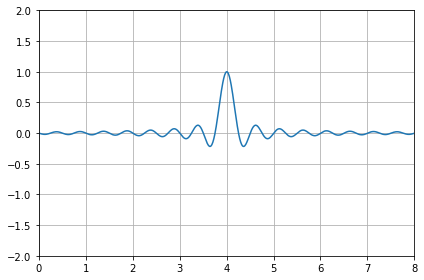

In [ ]:
x = np.arange(0,5*np.pi,0.01)
y = np.sinc(4*x - 5.1 * np.pi) 

fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_ylim(-2, 2)
ax.set_xlim(0, 8)

ax.grid()

plt.tight_layout()
plt.show()